In [1]:
import numpy as np
import math as m
from sympy import *
from scipy.integrate import solve_ivp # solving differential equations
import matplotlib.pyplot as plt # ploting results
import matplotlib.tri as tlt
mat = np.array

x ,y = symbols('x y')

In [2]:
def distance(p1,p2):
    d = np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    return d

In [3]:
def weight_1(d1,d2,dx):
    w1 = (d2+dx)/(d1+d2+dx)
    return w1/2

In [4]:
def weight_2(d1,d2,dx):
    w2 = (d1+dx)/(d1+d2+dx)
    return w2/2

In [5]:
def weight_x(d1,d2,dx):
    wx = (d1+d2)/(d1+d2+dx)
    return wx/2

In [6]:
def f_1_2(theta,midx,mid1):
    if theta<0:
        if midx[0]<mid1[0] or midx[1]<mid1[1]:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
        else:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
    elif theta == np.pi/2:
        
        if midx[0]>mid1[0]:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
        else:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
        
        if midx[0]>mid1[0] or midx[1]<mid1[1]:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
        else:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
    elif theta==0:
        if midx[1]<mid1[1]:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
        else:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
    elif theta >0 :
        if midx[0]>mid1[0] or midx[1]<mid1[1]:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
        else:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
        

In [7]:
def f_x(theta,midx,mid1):
    if theta<0:
        if midx[0]>mid1[0] or midx[1]>mid1[1]:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
        else:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
    elif theta == np.pi/2:
        if midx[0]<mid1[0]:
            print('sex')
            return (np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y)
        else:
            print('kurwa')
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y  
    elif theta==0:
        if midx[1]<mid1[1]:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y
        else:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
    elif theta >0:
        if midx[0]<mid1[0] or midx[1]<mid1[1]:
            return np.cos(theta+(np.pi/2))*x + np.sin(theta+(np.pi/2))*y
        else:
            return np.cos(theta-(np.pi/2))*x + np.sin(theta-(np.pi/2))*y

In [8]:
def middle(p1,p2):
    xm = (p1[0]+p2[0])/2
    ym = (p1[1]+p2[1])/2
    return [xm,ym]

In [9]:
def ploter(t1,t2,t3,xxx,yyy):
    L_1_x = [t1[0],t2[0]]
    L_1_y = [t1[1],t2[1]]
    L_2_x = [t1[0],t3[0]]
    L_2_y=[t1[1],t3[1]]
    L_3_x=[t2[0],t3[0]]
    L_3_y=[t2[1],t3[1]]
    plt.figure()
    plt.plot(L_3_x,L_3_y)
    plt.plot(L_1_x,L_1_y)
    plt.plot(L_2_x,L_2_y)
    plt.plot(xxx, yyy, label='Position')
    

In [10]:
def angle(p1,p2):
    if ((p1[0]-p2[0]) == 0):
        return np.pi/2
    else:
        return (np.arctan((p1[1]-p2[1])/(p1[0]-p2[0])))


In [42]:
t1 = [3,1]
t2 = [3,3]
t3 = [1,1]
mid_2 = middle(t1,t2)
mid_x = middle(t2,t3)
mid_1 = middle(t1,t3)
angle_2 = angle(t1,t2)
angle_x = angle(t2,t3)
angle_1 = angle(t1,t3)

pr = mid_x
print(f' {angle(t1,t2)*180/np.pi}  {angle(t2,t3)*180/np.pi}   {angle(t1,t3)*180/np.pi}' )

xxx = [pr[0]]
yyy = [pr[1]]
t = [0]
f1 = f_1_2(angle_1,mid_x,mid_1)
f2 = f_1_2(angle_2,mid_x,mid_2)
fx = f_x(angle_x,mid_x,mid_1)
for i in range(2):
    d1 = distance(mid_1,pr)
    d2 = distance(mid_2,pr)
    dx = distance(mid_x,pr)

    w1 = weight_1(d1,d2,dx)
    w2 = weight_2(d1,d2,dx)
    wx = weight_x(d1,d2,dx)
    print(f'w1 = {w1},w2 = {w2}, wx = {wx}')
    '''
    if(mid_x == middle(t1,t2)):
        h = w1*(cos(angle_1)*x+sin(angle_1)*y) - w2*(cos(angle_2)*x+sin(angle_2)*y) + wx*(cos(angle_x)*x+sin(angle_x)*y)  
    
    elif(mid_x == middle(t2,t3)):
          h = -w1*(cos(angle_1)*x+sin(angle_1)*y) + w2*(cos(angle_2)*x+sin(angle_2)*y) + wx*(cos(angle_x)*x+sin(angle_x)*y)  
    
    elif(mid_x == middle(t1,t3)):
         h = -w1*(cos(angle_1)*x+sin(angle_1)*y) - w2*(cos(angle_2)*x+sin(angle_2)*y) - wx*(cos(angle_x)*x+sin(angle_x)*y)  
    '''
    h = 0 * f1 + 0*f2 + 1*fx 
    hx = diff(h,x)
    hx1 = lambdify((x,y),hx)
    hy = diff(h,y)
    hy1 = lambdify((x,y),hy)
    
    hx11 = hx1(pr[0],pr[1])
    hy11 = hy1(pr[0],pr[1])
    pr[0]=pr[0]+hx11
    pr[1]=pr[1]+hy11
    xxx.append(pr[0])
    yyy.append(pr[1])
    t.append(i+1)


 90.0  45.0   0.0
w1 = 0.25,w2 = 0.25, wx = 0.5
w1 = 0.25,w2 = 0.25, wx = 0.5


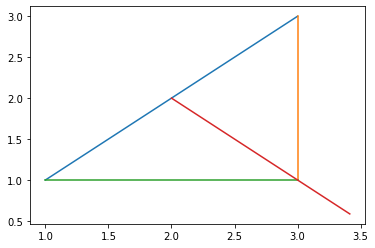

In [43]:
ploter(t1,t2,t3,xxx,yyy)

In [27]:
def kin(t,r):
    pr = r
    mid_1 = m[0]
    mid_2 = m[1]
    mid_x = m[2]
    
    f1 =m_f_1_2(mid_1,mid_x)
    f2 =m_f_1_2(mid_2,mid_x) 
    
    d1 = distance(mid_1,pr)
    d2 = distance(mid_2,pr)
    dx = distance(mid_x,pr)

    w1 = weight_1(d1,d2,dx)
    w2 = weight_2(d1,d2,dx)
    wx = weight_x(d1,d2,dx)
    
    mf_x = m_f_x(pr,mid_x)
    h = w1*f1+w2*f2+wx*mf_x
    hx = diff(h,x)
    hx1 = lambdify((x,y),hx)
    hy = diff(h,y)
    hy1 = lambdify((x,y),hy)
    
    
    theta = np.arctan2(pr[1],pr[0])
    theta1 = np.arctan2(hy1(pr[1],pr[0]),hx1(pr[1],pr[0]))
    U_1 = (hy1(pr[1],pr[0])+hx1(pr[1],pr[0]))/(np.cos(theta)+np.sin(theta))
    U_2 = theta1
    g = mat([[1,0],[0,np.cos(theta)],[0,np.sin(theta)]])
    q_dot = g @ mat([[U_2],[U_1]])
    return q_dot[1][0],q_dot[2][0]

In [ ]:
plt.figure()
plt.plot(L_3_x,L_3_y)
plt.plot(L_1_x,L_1_y)
plt.plot(L_2_x,L_2_y)
plt.plot(x, y, label='Position')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend(loc='best')

In [ ]:
import numpy as np

In [ ]:
print(mat([[1],[3]]))

In [ ]:
np.arctan(3.5)+pi

In [ ]:
cos(1.29249666778979+pi)

In [ ]:
cos(1.29249666778979+pi)

In [73]:
np.pi

3.141592653589793

In [ ]:
#147.99461679191648  90.0   32.005383208083494
"""
L_1_x = [1,3.5]
L_1_y = [1,5]
L_2_x = [1,6]
L_2_y=[1,1]
L_3_x=[3.5,6]
L_3_y=[5,1]
"""